# Inspecting the data

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a maximum score of 800 points. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend.

Datacamp provided a dataset called `schools.csv`, which is previewed below.

My tasked is to answer three key questions about New York City (NYC) public school SAT performance.

In [10]:
import pandas as pd

# Read in the data
#schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [15]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
 7   total_SAT        375 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 23.6+ KB


In [16]:
schools.describe()

,average_math,average_reading,average_writing,percent_tested,total_SAT
count,375.000000,375.000000,375.000000,355.000000,375.000000
mean,432.944000,424.504000,418.458667,64.976338,1275.906667
std,71.952373,61.881069,64.548599,18.747634,194.906283
min,317.000000,302.000000,284.000000,18.500000,924.000000
25%,386.000000,386.000000,382.000000,50.950000,1157.000000
50%,415.000000,413.000000,403.000000,64.800000,1226.000000
75%,458.500000,445.000000,437.500000,79.600000,1330.500000
max,754.000000,697.000000,693.000000,100.000000,2144.000000


In [17]:
schools.isnull().sum()

school_name         0
borough             0
building_code       0
average_math        0
average_reading     0
average_writing     0
percent_tested     20
total_SAT           0
dtype: int64

# Dataset Dictionary

| Column                        | Description
|------------------------------:| :------------------------------------------------
|school_name                    | Name of school
|borough                        | Borough that the school is located in
|building_code                  | Code for the building
|average_math                   | Average math score for SATs
|average_reading                | Average reading score for SATs 
|average_writing                | Average writing score for SATs
|percent_tested                 | Percentage of students completing SATs

# Answer 

### Question 1:

Create a pandas DataFrame called best_math_schools containing the `school_name` and `average_math` score for all schools where the results are at least 80% of the maximum possible score, sorted by `average_math` in descending order.

In [11]:
# Which schools are best for math?
best_math_schools = schools[schools["average_math"] >= 640][["school_name", "average_math"]].sort_values("average_math", ascending=False)
best_math_schools

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


### Question 2:

Identify the top 10 performing schools based on scores across the three SAT sections, storing as a pandas DataFrame called top_10_schools containing the school name and a column named `total_SAT`, with results sorted by total_SAT in descending order.

In [12]:
# Calculate total_SAT per school
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]

# Who are the top 10 performing schools?
top_10_schools = schools.groupby("school_name", as_index=False)["total_SAT"].mean().sort_values("total_SAT", ascending=False).head(10)
top_10_schools

,school_name,total_SAT
325,Stuyvesant High School,2144.0
324,Staten Island Technical High School,2041.0
55,Bronx High School of Science,2041.0
188,High School of American Studies at Lehman College,2013.0
334,Townsend Harris High School,1981.0
293,Queens High School for the Sciences at York Co...,1947.0
30,Bard High School Early College,1914.0
83,Brooklyn Technical High School,1896.0
121,Eleanor Roosevelt High School,1889.0
180,"High School for Mathematics, Science, and Engi...",1889.0


### Question 3:

Locate the NYC borough with the largest standard deviation for `total_SAT`, storing as a DataFrame called largest_std_dev with `borough` as the index and three columns: `num_schools` for the number of schools in the borough, `average_SAT` for the mean of `total_SAT`, and `std_SAT` for the standard deviation of `total_SAT`. Round all numeric values to two decimal places.

In [13]:
# Which NYC borough has the highest standard deviation for total_SAT?
boroughs = schools.groupby("borough")["total_SAT"].agg(["count", "mean", "std"]).round(2)

# Filter for max std and reset index so borough is a column
largest_std_dev = boroughs[boroughs["std"] == boroughs["std"].max()]

# Rename the columns for clarity
largest_std_dev = largest_std_dev.rename(columns={"count": "num_schools", "mean": "average_SAT", "std": "std_SAT"})
largest_std_dev

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29


# Additional: Exploratory Data Analysis

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

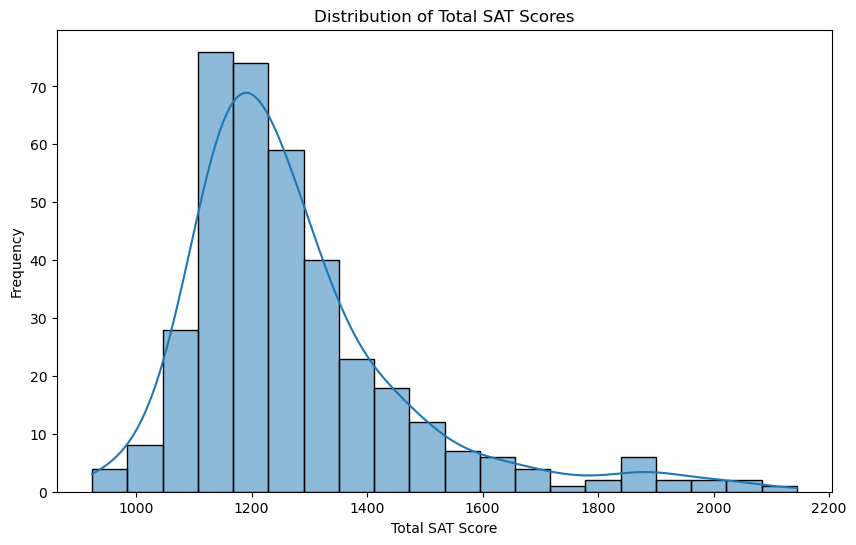

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=schools, x='total_SAT', bins=20, kde=True)
plt.title('Distribution of Total SAT Scores')
plt.xlabel('Total SAT Score')
plt.ylabel('Frequency')
plt.show()

*Observation: The distribution of total SAT scores across all schools appears to be approximately normal, with a slight right skew. Most schools cluster around the 1200 total scores, indicating some consistency in performance.*

C:\Users\huawei\AppData\Local\Temp\ipykernel_2408\802898998.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=schools, x='borough', y='total_SAT', ci=None, estimator=np.mean)


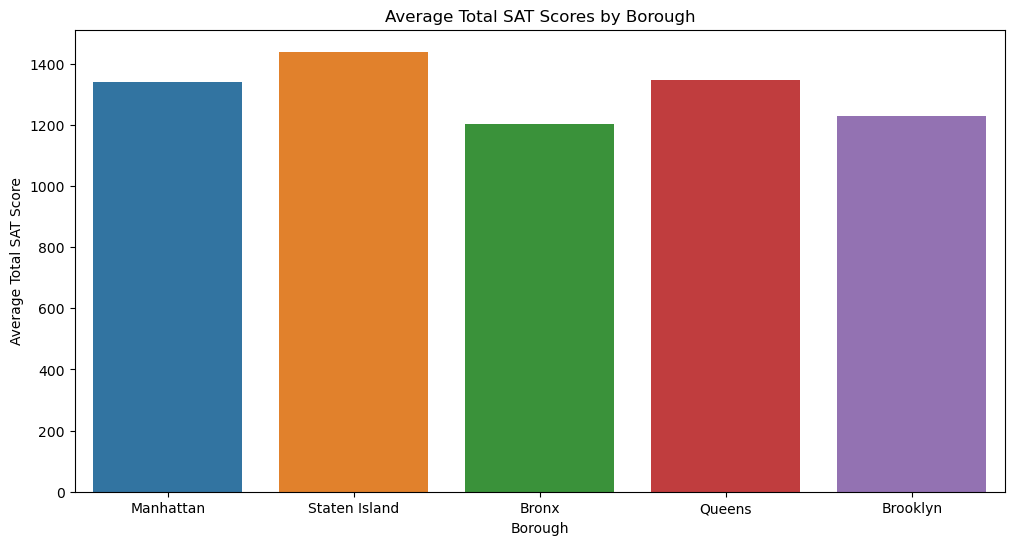

In [32]:
# Borough-wise Total SAT Scores
plt.figure(figsize=(12, 6))
sns.barplot(data=schools, x='borough', y='total_SAT', ci=None, estimator=np.mean)
plt.title('Average Total SAT Scores by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Total SAT Score')
plt.show()

*Observation: There is noticeable variation in average total SAT scores across different boroughs. Staten Island tends to have higher average scores compared to other boroughs, suggesting potential differences in educational resources or strategies.*

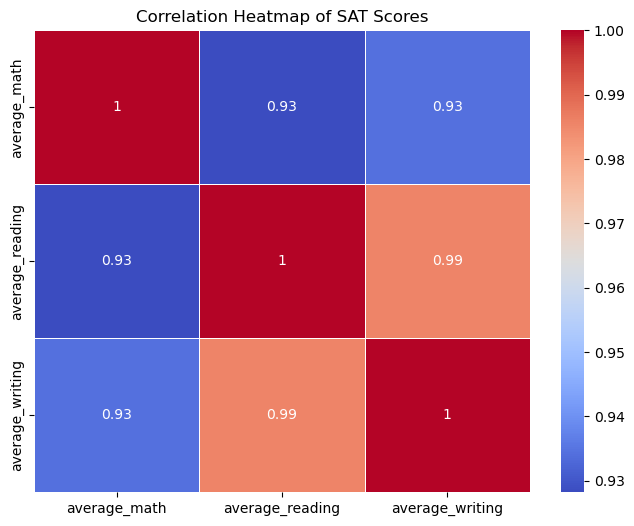

In [33]:
# Correlation Headmap between average math, reading and writing
correlation_matrix = schools[['average_math', 'average_reading', 'average_writing']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of SAT Scores')
plt.show()

*Observation: The correlation heatmap shows a strong positive correlation between average math and reading scores, indicating that students who perform well in math also tend to perform well in reading. The correlation with writing scores is slightly lower but still positive*

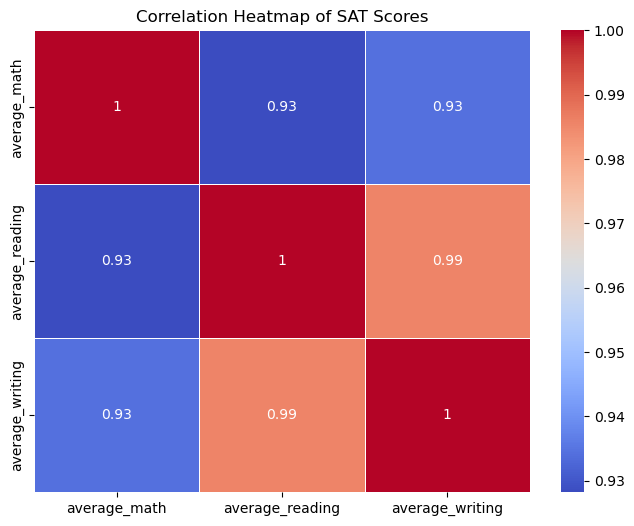

In [25]:
# Correlation Heatmap between avarage math, avarage reading and average writing
correlation_matrix = schools[['average_math', 'average_reading', 'average_writing']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of SAT Scores')
plt.show()

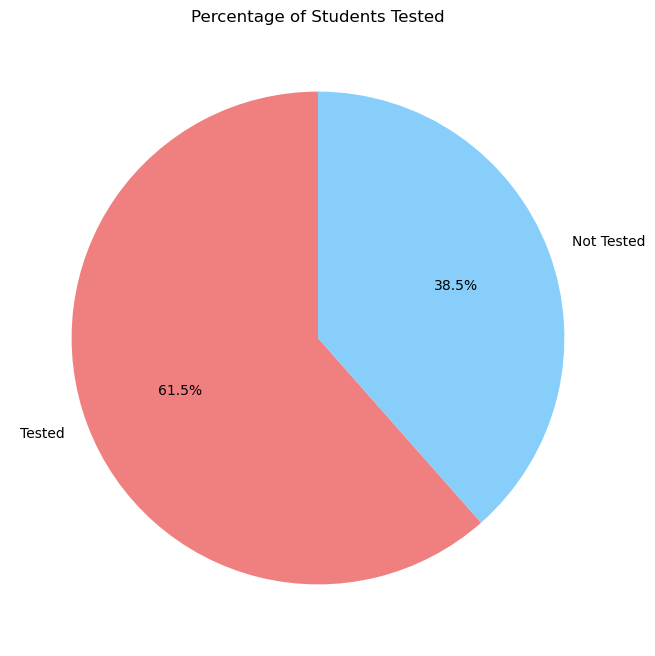

In [26]:
# Percentage of Students Tested
plt.figure(figsize=(8, 8))
schools['percent_tested'].fillna(0, inplace=True)  # Replacing null values with 0
labels = ['Tested', 'Not Tested']
sizes = [schools['percent_tested'].mean(), 100 - schools['percent_tested'].mean()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Percentage of Students Tested')
plt.show()

*Observation: The majority of schools have a high percentage of students who took the SAT. However, there are some schools with a lower percentage, indicating potential variations in participation rates across different institutions.*

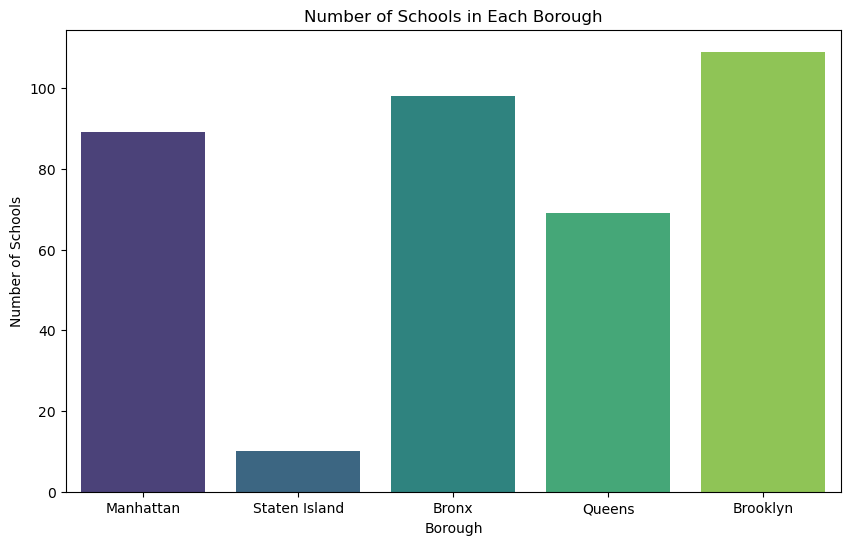

In [27]:
# School Count by Borough
plt.figure(figsize=(10, 6))
sns.countplot(data=schools, x='borough', palette='viridis')
plt.title('Number of Schools in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.show()

*Observation: Brooklyn has the highest number of schools in the dataset, followed by Bronx Borough and Manhattan. The distribution of schools across boroughs is uneven, which may impact the overall SAT score distribution.*

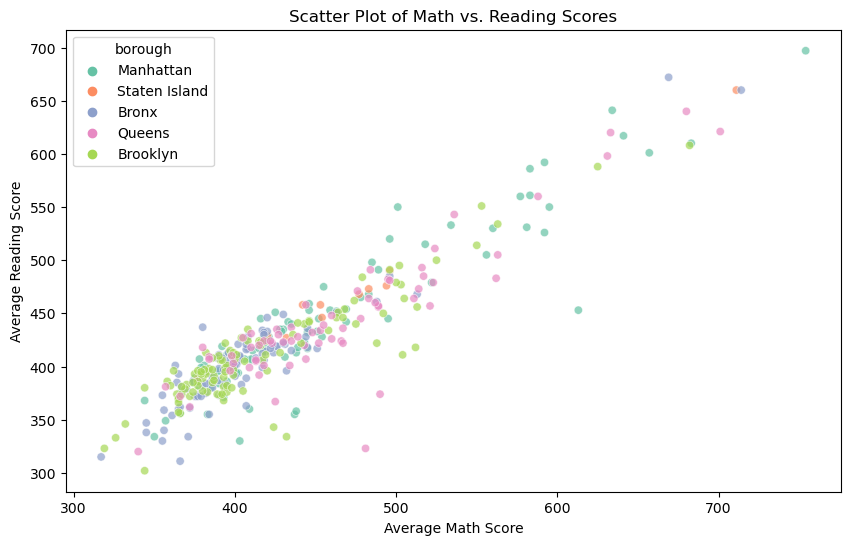

In [28]:
# Plot of Math vs. Reading Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=schools, x='average_math', y='average_reading', hue='borough', palette='Set2', alpha=0.7)
plt.title('Scatter Plot of Math vs. Reading Scores')
plt.xlabel('Average Math Score')
plt.ylabel('Average Reading Score')
plt.show()

*Observation: The scatter plot reveals a positive linear relationship between average math and reading scores. Most schools fall within a clustered region, but there are some outliers with exceptionally high scores in both subjects*

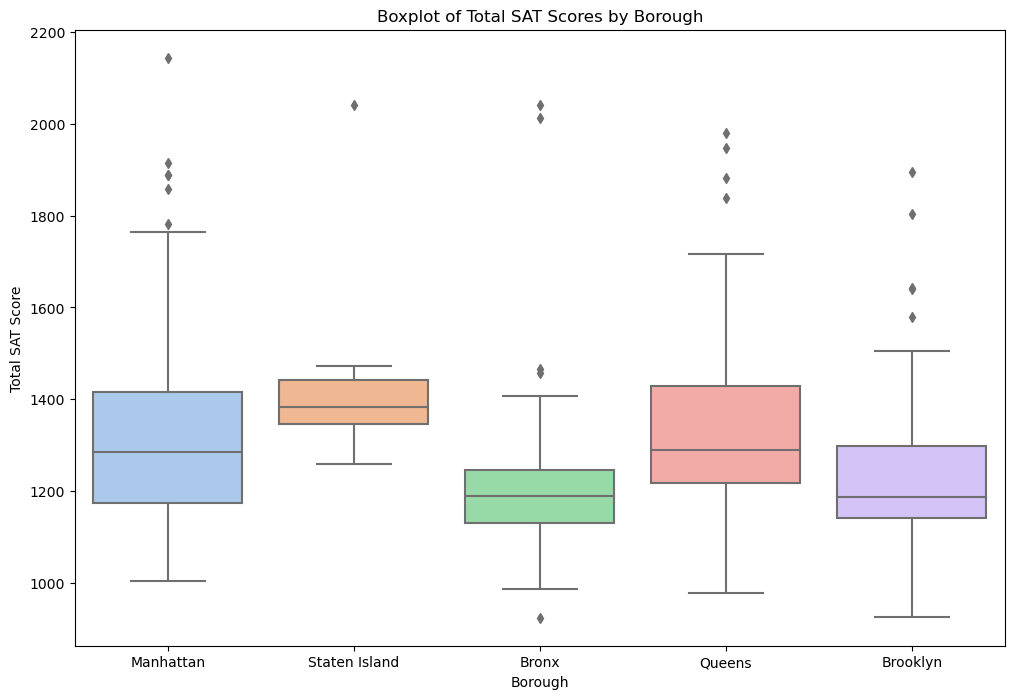

In [29]:
# Boxplot of Total SAT Scores by Borough
plt.figure(figsize=(12, 8))
sns.boxplot(data=schools, x='borough', y='total_SAT', palette='pastel')
plt.title('Boxplot of Total SAT Scores by Borough')
plt.xlabel('Borough')
plt.ylabel('Total SAT Score')
plt.show()

*Observation: The boxplot illustrates the spread of total SAT scores within each borough. Manhattan has a wider interquartile range, suggesting greater variability in performance compared to other boroughs.*

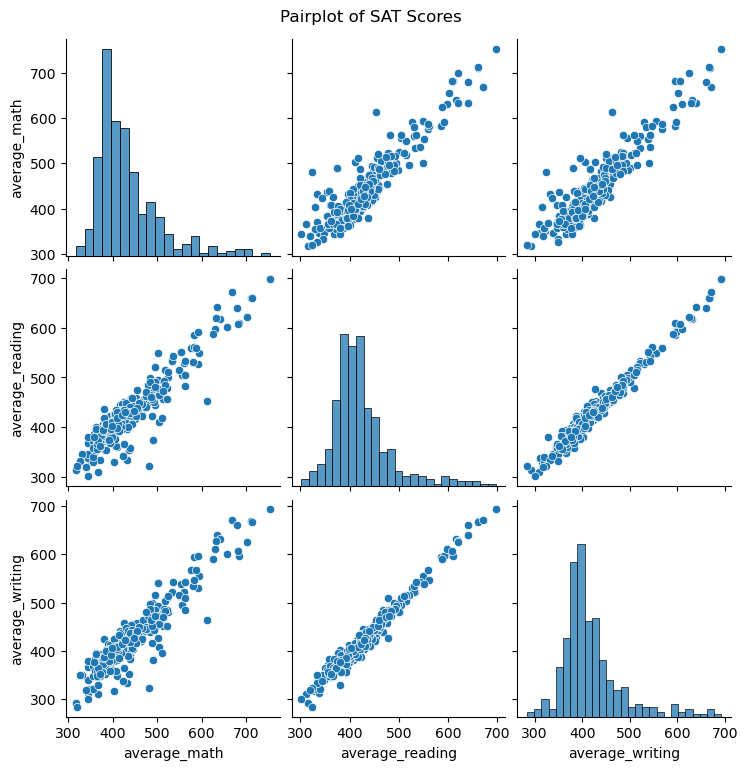

In [30]:
# Pairplot for SAT Scores
sns.pairplot(data=schools[['average_math', 'average_reading', 'average_writing']])
plt.suptitle('Pairplot of SAT Scores', y=1.02)
plt.show()